# Współczesne metody heurystyczne
## PB14 - Wykorzystanie algorytmu ewolucyjnego do doboru parametrów SVM do zadania klasyfikacji
### Agnieszka Czaplicka, Bartosz Sowul

# test: instalacja potrzebnych modułów

In [ ]:
%matplotlib inline
!pip install pathos
!pip install tqdm
!pip install matplotlib
!pip install pandas
!pip install numexpr
!pip install numpy
!pip install scikit_learn

## test: czy jupyter widzi nasz moduł?

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -0.12943128071969878



gen: 5
avg time per gen: 0.7
Best params:
C: 3.3362342182931304
Gamma: 0.10188218429604569
neg_log_loss: -0.11470314891494525



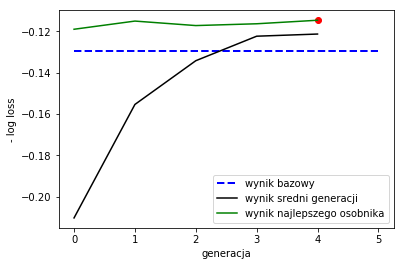

In [2]:
from ga.evoalgo_svm import EvoAlgo

from sklearn.datasets import load_iris
from sklearn.svm import SVC

clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='auto')
ea = EvoAlgo(clf, pop_members=60, max_iter=5)
iris = load_iris()
ea.fit(iris.data, iris.target)

ea.get_params()
ea.plot()

## Funkcja pomocniczna do zapisu wyników eksperymentów do pliku csv

In [3]:
import csv
from pathlib import Path

def save_results(results, filename='results.csv'):
    mode = 'w'
    path = Path(filename)
    if path.is_file():
         mode = 'a'
    with open(filename, mode) as f:
        w = csv.writer(f)
        if mode == 'w':
            w.writerow(results[0].keys())
        else:
            pass
        for result in results:
            w.writerow(result.values())

## Ładowanie danych

In [ ]:
import numpy as np
from collections import OrderedDict


class DataSet:
    def __init__(self, data, target):
        self.data = data
        self.target = target


def load_data(name, concatenate_classes=False):
    filename = "./../data/rs_training_" + name + "_no_headers.txt"
    data = np.loadtxt(filename)
    train = DataSet(data[:, :np.shape(data)[1] - 1], data[:, np.shape(data)[1] - 1])
        
    filename = "./../data/rs_testing_" + name + "_no_headers.txt"
    data = np.loadtxt(filename)
    print(np.shape(data))
    test = DataSet(data[:, :np.shape(data)[1] - 1], data[:, np.shape(data)[1] - 1])
    
    # przeksztalcenie danych do zakresu [-1,1]
    max_train = np.amax(train.data, axis=0)
    min_train = np.amin(train.data, axis=0)
    train.data = 2 * (train.data - min_train) / (max_train - min_train) - 1
    test.data = 2 * (test.data - min_train) / (max_train - min_train) - 1
    
    if concatenate_classes == True:
        train.target = (np.around(train.target / 10)) * 10
        test.target = (np.around(test.target / 10)) * 10
    
    target_list = sorted(list(OrderedDict.fromkeys(train.target)))

    print(list(target_list))
    
    return train, test
  
# test
'''
train, test = load_data('tani', True)
print('Train:')
print(train.data[5, :])
print(train.target[5])
print('\nTest:')
print(test.data[5, :])
print(test.target[5])
'''

## Testowanie programu

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

(102, 37)
[-60.0, -50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]
Base score: -2.427450906750951



gen: 5
avg time per gen: 0.2

Optymalizacja trwała 1.04 sekund dla 10 osobników i 5 iteracji.
Best params:
C: 0.7758846540122553
Gamma: 0.7413341011502619
neg_log_loss: -2.371989216861172



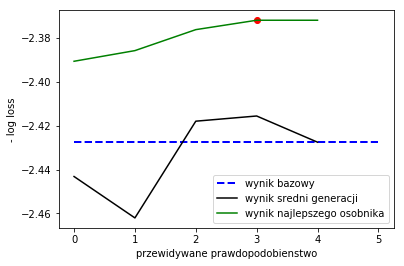

Generation:  10%|█         | 1/10 [00:00<00:00,  9.37it/s]

Base score: -2.4368527799150215



gen: 10
avg time per gen: 0.3

Optymalizacja trwała 2.65 sekund dla 10 osobników i 10 iteracji.
Best params:
C: 0.8627554987957978
Gamma: 0.6126196346403329
neg_log_loss: -2.3758613007826073



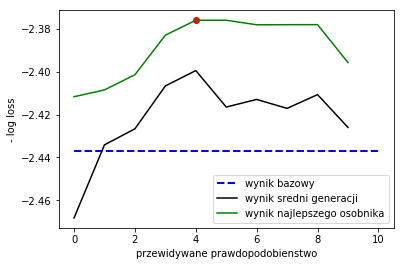

Generation:   5%|▌         | 1/20 [00:00<00:01,  9.58it/s]

Base score: -2.40955612229651



gen: 20
avg time per gen: 0.4

Optymalizacja trwała 8.34 sekund dla 10 osobników i 20 iteracji.
Best params:
C: 0.8548787362625244
Gamma: 0.6501058335071284
neg_log_loss: -2.3728644990270116



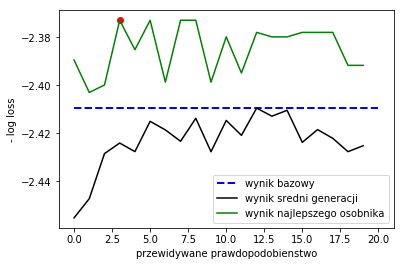

Generation:   2%|▏         | 1/50 [00:00<00:05,  8.17it/s]

Base score: -2.418046293713763



gen: 50
avg time per gen: 0.9

Optymalizacja trwała 45.73 sekund dla 10 osobników i 50 iteracji.
Best params:
C: 0.8283790512172586
Gamma: 0.8380938124920977
neg_log_loss: -2.3513782926791533



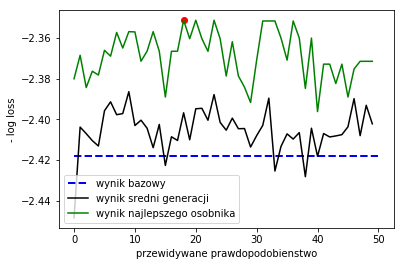

Generation:   1%|          | 1/100 [00:00<00:10,  9.17it/s]

Base score: -2.408964392289513



gen: 100
avg time per gen: 2.0

Optymalizacja trwała 195.91 sekund dla 10 osobników i 100 iteracji.
Best params:
C: 0.9907354629769027
Gamma: 0.6425677356542033
neg_log_loss: -2.346511991768587



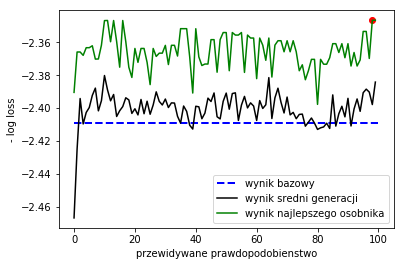

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4364751763534302



gen: 5
avg time per gen: 0.3

Optymalizacja trwała 1.44 sekund dla 20 osobników i 5 iteracji.
Best params:
C: 0.9912006601426073
Gamma: 0.6768123132370989
neg_log_loss: -2.364095838424963



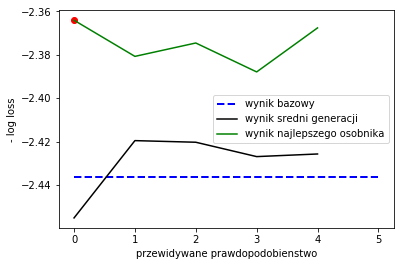

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.4186988313703646



gen: 10
avg time per gen: 0.4

Optymalizacja trwała 4.11 sekund dla 20 osobników i 10 iteracji.
Best params:
C: 0.8820119563726607
Gamma: 0.5211558329158522
neg_log_loss: -2.3707415271601873



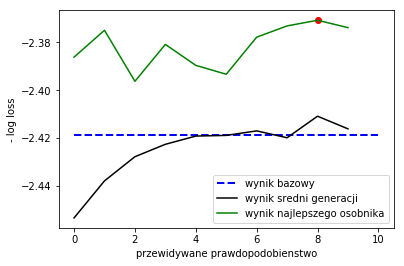

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4527964694898117



gen: 20
avg time per gen: 0.6

Optymalizacja trwała 12.14 sekund dla 20 osobników i 20 iteracji.
Best params:
C: 0.8100990088127223
Gamma: 0.792571497068552
neg_log_loss: -2.3432003153794967



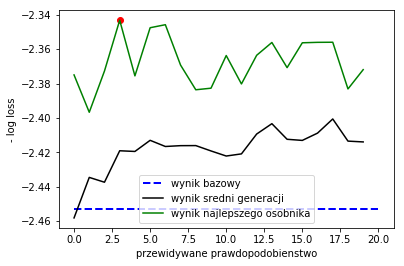

Generation:   2%|▏         | 1/50 [00:00<00:09,  5.37it/s]

Base score: -2.485936621635494



gen: 50
avg time per gen: 1.2

Optymalizacja trwała 59.95 sekund dla 20 osobników i 50 iteracji.
Best params:
C: 0.9655607859180638
Gamma: 0.8838011352119726
neg_log_loss: -2.3362841125241935



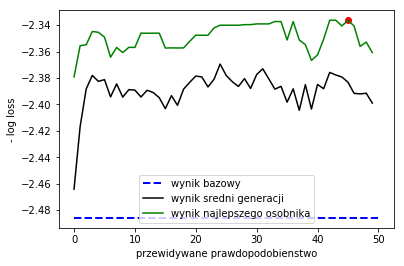

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.5152702777588063



gen: 100
avg time per gen: 2.2

Optymalizacja trwała 224.52 sekund dla 20 osobników i 100 iteracji.
Best params:
C: 0.858748264200284
Gamma: 0.9003076774051744
neg_log_loss: -2.3380634875466644



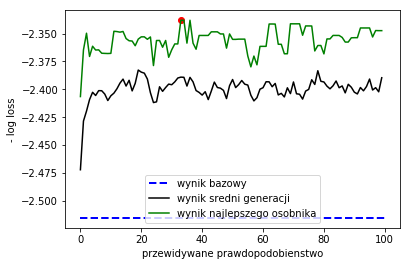

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.462243359735948



gen: 5
avg time per gen: 0.7

Optymalizacja trwała 3.31 sekund dla 50 osobników i 5 iteracji.
Best params:
C: 0.9547122131166244
Gamma: 0.960456086582118
neg_log_loss: -2.3264658770690074



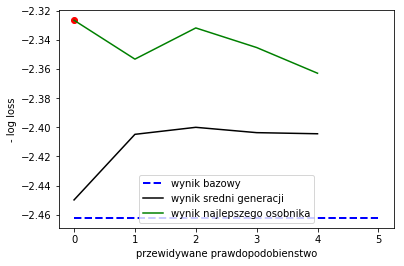

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.4243524586065064



gen: 10
avg time per gen: 0.9

Optymalizacja trwała 9.54 sekund dla 50 osobników i 10 iteracji.
Best params:
C: 0.5592787634567863
Gamma: 0.9211787933223755
neg_log_loss: -2.349331249660851



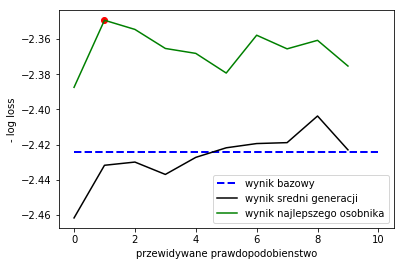

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4101940738716596



gen: 20
avg time per gen: 1.4

Optymalizacja trwała 28.68 sekund dla 50 osobników i 20 iteracji.
Best params:
C: 0.9101234768770301
Gamma: 0.7567226503854696
neg_log_loss: -2.3522389008483504



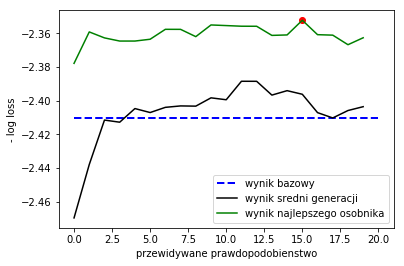

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.4311729129252275



gen: 50
avg time per gen: 2.8

Optymalizacja trwała 140.99 sekund dla 50 osobników i 50 iteracji.
Best params:
C: 0.9062648500554736
Gamma: 0.7691715284779094
neg_log_loss: -2.343049641682015



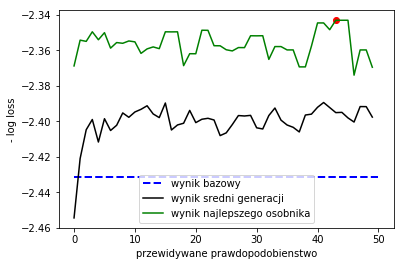

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.441334283665758



gen: 100
avg time per gen: 5.4

Optymalizacja trwała 536.92 sekund dla 50 osobników i 100 iteracji.
Best params:
C: 0.8595242598066284
Gamma: 0.8320563793448346
neg_log_loss: -2.339383947687103



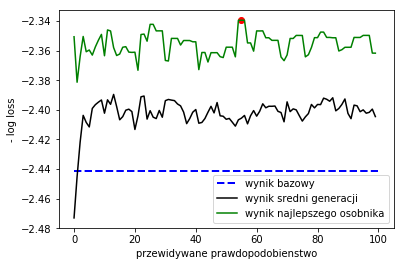

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.3914274763308674



gen: 5
avg time per gen: 1.2

Optymalizacja trwała 5.92 sekund dla 100 osobników i 5 iteracji.
Best params:
C: 0.8223928859419048
Gamma: 0.5392371203691382
neg_log_loss: -2.3516540120984715



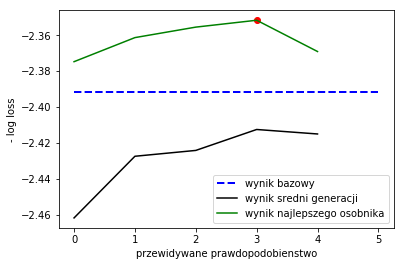

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.4236932711816035



gen: 10
avg time per gen: 1.6

Optymalizacja trwała 16.24 sekund dla 100 osobników i 10 iteracji.
Best params:
C: 0.8263092978959723
Gamma: 0.7797838740104129
neg_log_loss: -2.341963821640012



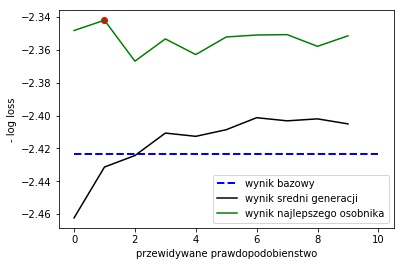

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.441170066781377



gen: 20
avg time per gen: 3.4

Optymalizacja trwała 67.41 sekund dla 100 osobników i 20 iteracji.
Best params:
C: 0.951889641282794
Gamma: 0.8099408699204832
neg_log_loss: -2.325683609255715



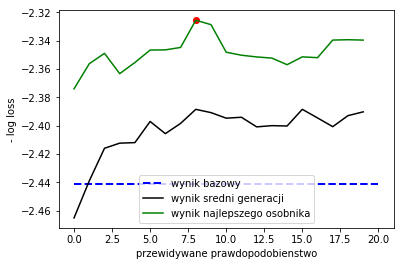

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.3767740940297104



gen: 50
avg time per gen: 6.4

Optymalizacja trwała 322.54 sekund dla 100 osobników i 50 iteracji.
Best params:
C: 0.8739367482517176
Gamma: 0.8376958289112846
neg_log_loss: -2.332778583001528



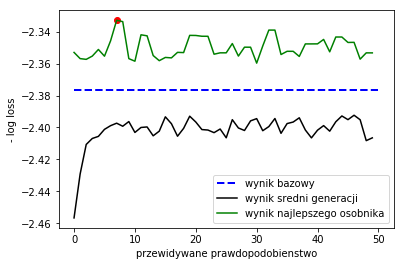

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.4389822864989084



gen: 100
avg time per gen: 10.1

Optymalizacja trwała 1014.99 sekund dla 100 osobników i 100 iteracji.
Best params:
C: 0.9412857042267461
Gamma: 0.8953558271594874
neg_log_loss: -2.3221373722395584



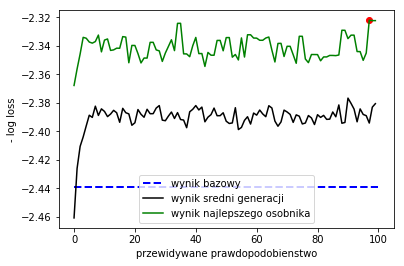

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4373667182447774



gen: 5
avg time per gen: 2.4

Optymalizacja trwała 11.84 sekund dla 200 osobników i 5 iteracji.
Best params:
C: 0.9648466993514622
Gamma: 0.9395230916256574
neg_log_loss: -2.341326611622672



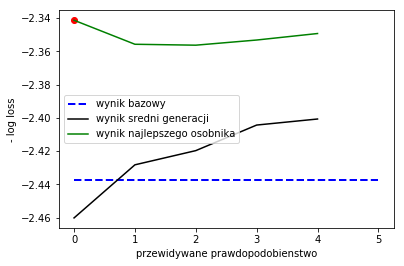

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.522425723395932



gen: 10
avg time per gen: 3.1

Optymalizacja trwała 31.17 sekund dla 200 osobników i 10 iteracji.
Best params:
C: 0.9246432526502003
Gamma: 0.871136042528285
neg_log_loss: -2.339811480766946



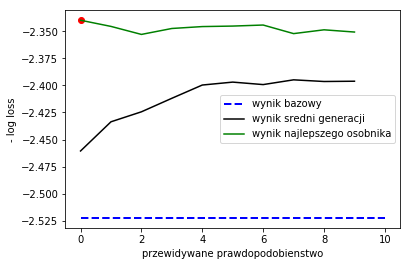

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4680258828522006



gen: 20
avg time per gen: 5.3

Optymalizacja trwała 106.72 sekund dla 200 osobników i 20 iteracji.
Best params:
C: 0.8863845040712534
Gamma: 0.8700402116000792
neg_log_loss: -2.3344964846899785



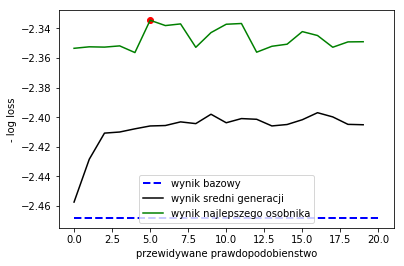

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.423632689970976



gen: 50
avg time per gen: 10.6

Optymalizacja trwała 529.85 sekund dla 200 osobników i 50 iteracji.
Best params:
C: 0.8741161121302884
Gamma: 0.7690284966527805
neg_log_loss: -2.3359518567070676



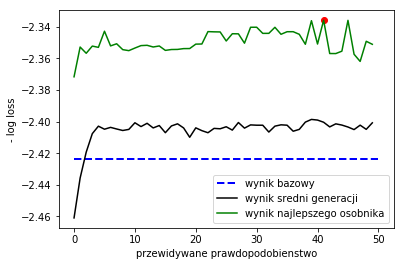

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.4337152816141723



gen: 100
avg time per gen: 19.1

Optymalizacja trwała 1911.65 sekund dla 200 osobników i 100 iteracji.
Best params:
C: 0.890946954387901
Gamma: 0.8970661339121249
neg_log_loss: -2.3255460921860633



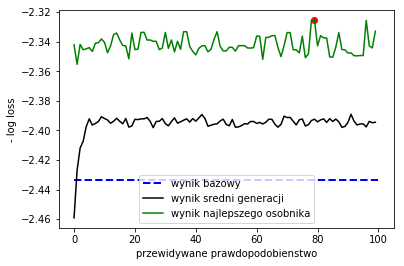

Generation:  20%|██        | 1/5 [00:00<00:00,  9.34it/s]

(102, 37)
[-60.0, -50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]
Base score: -2.754515583213788



gen: 5
avg time per gen: 0.2

Optymalizacja trwała 0.90 sekund dla 10 osobników i 5 iteracji.
Best params:
C: 0.5833127270076859
Gamma: 0.8760331776105643
neg_log_loss: -2.376070589262282



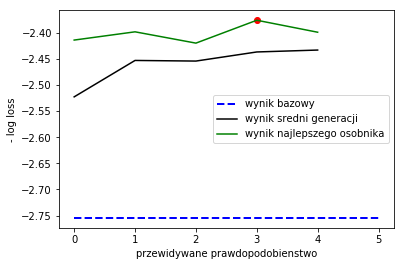

Generation:  10%|█         | 1/10 [00:00<00:00,  9.07it/s]

Base score: -2.4756786125424446



gen: 10
avg time per gen: 0.2

Optymalizacja trwała 2.52 sekund dla 10 osobników i 10 iteracji.
Best params:
C: 0.6170342327991497
Gamma: 0.5551633003348033
neg_log_loss: -2.3772267697593286



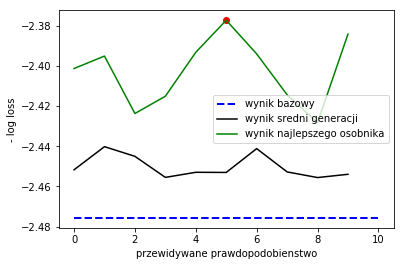

Generation:   5%|▌         | 1/20 [00:00<00:02,  8.94it/s]

Base score: -2.5414406268449805



gen: 20
avg time per gen: 0.4

Optymalizacja trwała 8.43 sekund dla 10 osobników i 20 iteracji.
Best params:
C: 0.5076440592020871
Gamma: 0.9306323042043232
neg_log_loss: -2.365264799685521



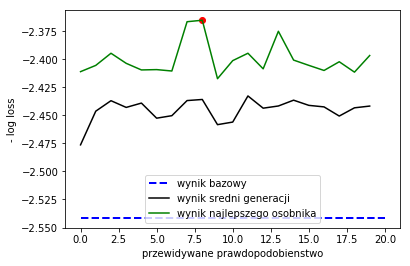

Generation:   2%|▏         | 1/50 [00:00<00:05,  8.40it/s]

Base score: -2.490304071441387



gen: 50
avg time per gen: 0.9

Optymalizacja trwała 45.35 sekund dla 10 osobników i 50 iteracji.
Best params:
C: 0.502327798988766
Gamma: 0.9085841465770249
neg_log_loss: -2.348504328232898



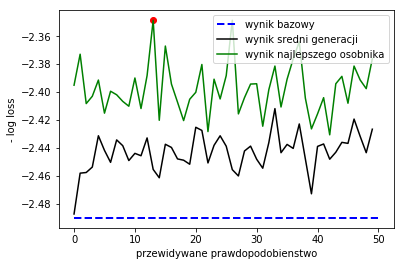

Generation:   1%|          | 1/100 [00:00<00:10,  9.36it/s]

Base score: -2.5431271363533883



gen: 100
avg time per gen: 1.7

Optymalizacja trwała 173.70 sekund dla 10 osobników i 100 iteracji.
Best params:
C: 0.7056627159719886
Gamma: 0.6975876027004817
neg_log_loss: -2.328257875657253



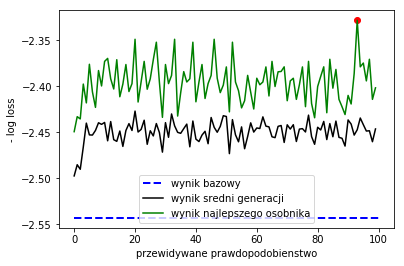

Generation:  20%|██        | 1/5 [00:00<00:00,  5.34it/s]

Base score: -2.376924821303388



gen: 5
avg time per gen: 0.3

Optymalizacja trwała 1.36 sekund dla 20 osobników i 5 iteracji.
Best params:
C: 0.8139334002559769
Gamma: 0.8013471816806189
neg_log_loss: -2.344712736702871



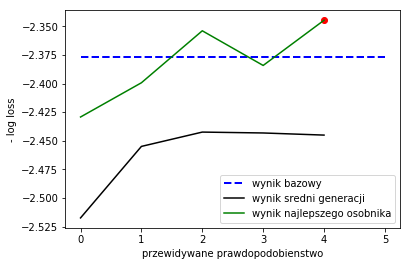

Generation:  10%|█         | 1/10 [00:00<00:01,  5.31it/s]

Base score: -2.4942401744409963



gen: 10
avg time per gen: 0.4

Optymalizacja trwała 3.77 sekund dla 20 osobników i 10 iteracji.
Best params:
C: 0.6774499800556526
Gamma: 0.6436769727950938
neg_log_loss: -2.3510942153531005



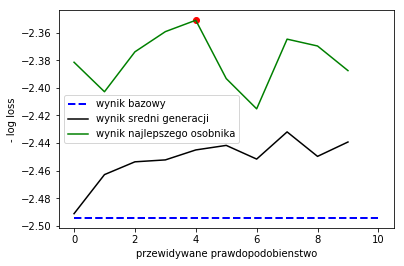

Generation:   5%|▌         | 1/20 [00:00<00:03,  5.52it/s]

Base score: -2.54042336181811



gen: 20
avg time per gen: 0.6

Optymalizacja trwała 11.45 sekund dla 20 osobników i 20 iteracji.
Best params:
C: 0.4444174281778298
Gamma: 0.859860942464336
neg_log_loss: -2.3496565902752042



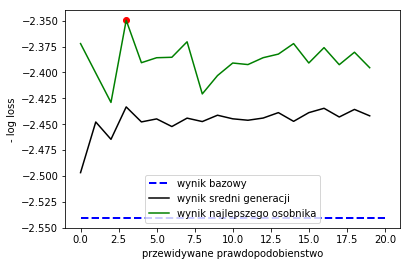

Generation:   2%|▏         | 1/50 [00:00<00:08,  5.49it/s]

Base score: -2.745443647926252



gen: 50
avg time per gen: 1.3

Optymalizacja trwała 64.18 sekund dla 20 osobników i 50 iteracji.
Best params:
C: 0.8292942024388807
Gamma: 0.6608697034175466
neg_log_loss: -2.3528076622986926



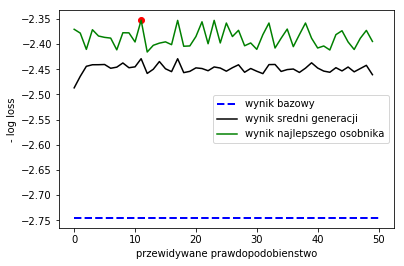

Generation:   1%|          | 1/100 [00:00<00:18,  5.50it/s]

Base score: -2.4537594289356504



gen: 100
avg time per gen: 2.4

Optymalizacja trwała 243.72 sekund dla 20 osobników i 100 iteracji.
Best params:
C: 0.7352980387223674
Gamma: 0.6498674106147461
neg_log_loss: -2.327358220194702



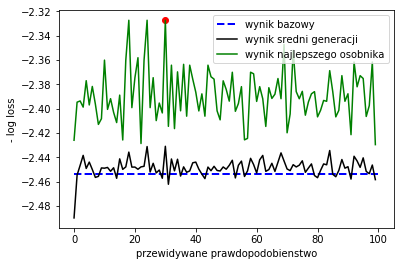

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.452166213388111



gen: 5
avg time per gen: 0.6

Optymalizacja trwała 3.09 sekund dla 50 osobników i 5 iteracji.
Best params:
C: 0.7578862970159553
Gamma: 0.5712314784055581
neg_log_loss: -2.340524219557725



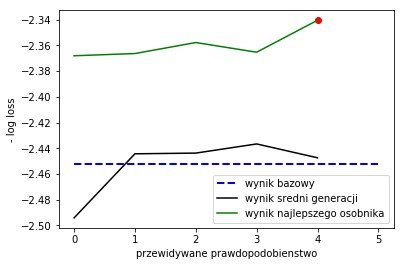

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.5758712312441294



gen: 10
avg time per gen: 0.9

Optymalizacja trwała 8.91 sekund dla 50 osobników i 10 iteracji.
Best params:
C: 0.6355299197934415
Gamma: 0.42136026988469355
neg_log_loss: -2.3680914122570753



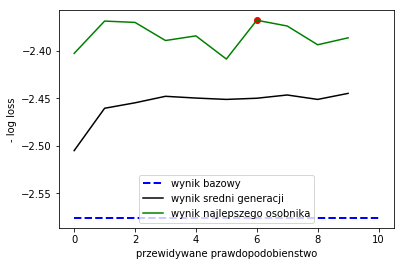

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.5867274070469586



gen: 20
avg time per gen: 1.6

Optymalizacja trwała 32.54 sekund dla 50 osobników i 20 iteracji.
Best params:
C: 0.7503856313836762
Gamma: 0.5923005313893355
neg_log_loss: -2.353272326668601



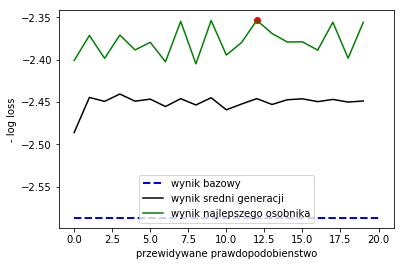

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.560147160048528



gen: 50
avg time per gen: 3.6

Optymalizacja trwała 179.28 sekund dla 50 osobników i 50 iteracji.
Best params:
C: 0.5117876310936811
Gamma: 0.7106596479999042
neg_log_loss: -2.3568040843686324



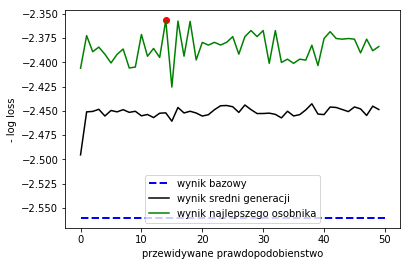

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.4506890212535195



gen: 100
avg time per gen: 5.7

Optymalizacja trwała 571.78 sekund dla 50 osobników i 100 iteracji.
Best params:
C: 0.7202318327335419
Gamma: 0.6314636071699881
neg_log_loss: -2.295972238906593



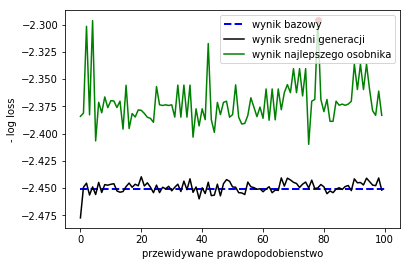

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.771153047080591



gen: 5
avg time per gen: 1.5

Optymalizacja trwała 7.54 sekund dla 100 osobników i 5 iteracji.
Best params:
C: 0.9973530958532234
Gamma: 0.7559665407636124
neg_log_loss: -2.3479598171045355



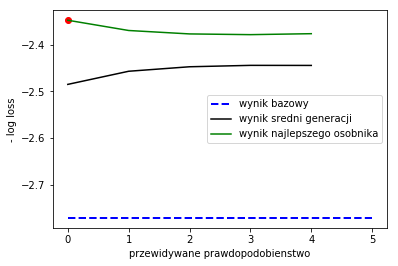

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.583075556325699



gen: 10
avg time per gen: 1.8

Optymalizacja trwała 18.35 sekund dla 100 osobników i 10 iteracji.
Best params:
C: 0.5024073615070329
Gamma: 0.7020687933417022
neg_log_loss: -2.362610706658758



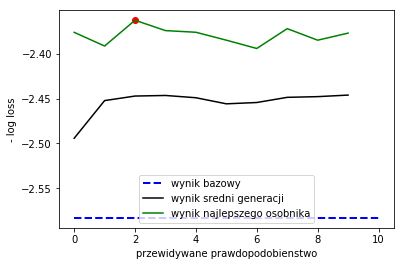

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.538995738630562



gen: 20
avg time per gen: 2.6

Optymalizacja trwała 52.28 sekund dla 100 osobników i 20 iteracji.
Best params:
C: 0.7312888657560173
Gamma: 0.7593717428233953
neg_log_loss: -2.3225906230021764



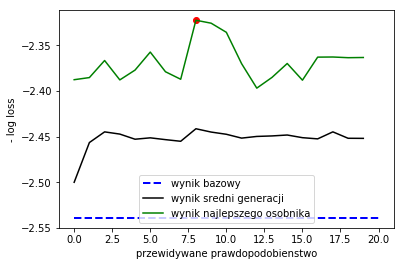

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.477787896498672



gen: 50
avg time per gen: 6.1

Optymalizacja trwała 303.40 sekund dla 100 osobników i 50 iteracji.
Best params:
C: 0.69383513740584
Gamma: 0.5799562545686713
neg_log_loss: -2.3181381453375085



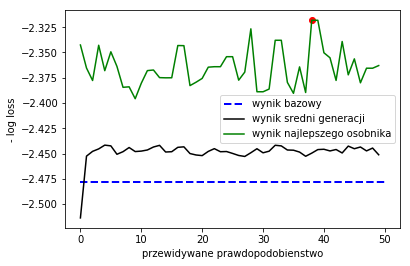

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.5669695988364127



gen: 100
avg time per gen: 9.8

Optymalizacja trwała 977.43 sekund dla 100 osobników i 100 iteracji.
Best params:
C: 0.657950546686896
Gamma: 0.5401670540208187
neg_log_loss: -2.305615581562825



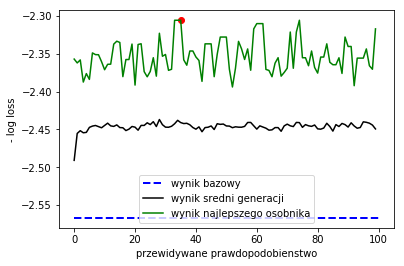

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.5164608711330425



gen: 5
avg time per gen: 2.2

Optymalizacja trwała 11.24 sekund dla 200 osobników i 5 iteracji.
Best params:
C: 0.8643748934369021
Gamma: 0.6627693588399239
neg_log_loss: -2.3494093487326055



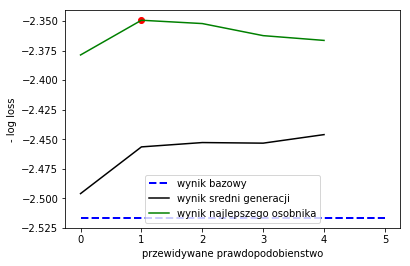

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.6334895785748444



gen: 10
avg time per gen: 2.9

Optymalizacja trwała 29.46 sekund dla 200 osobników i 10 iteracji.
Best params:
C: 0.7273701358098466
Gamma: 0.7254549849484202
neg_log_loss: -2.322619595835616



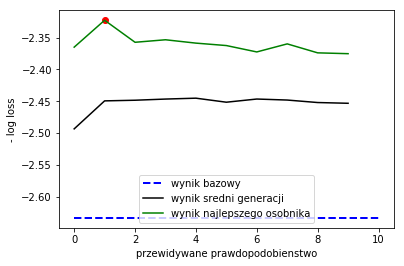

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4623130986065718



gen: 20
avg time per gen: 4.4

Optymalizacja trwała 89.09 sekund dla 200 osobników i 20 iteracji.
Best params:
C: 0.7281419805974406
Gamma: 0.6514744438008752
neg_log_loss: -2.2993472176201397



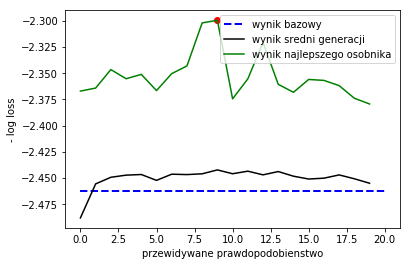

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.580734950957468



gen: 50
avg time per gen: 11.0

Optymalizacja trwała 553.39 sekund dla 200 osobników i 50 iteracji.
Best params:
C: 0.7313268089640155
Gamma: 0.6332417268207069
neg_log_loss: -2.2987362594287553



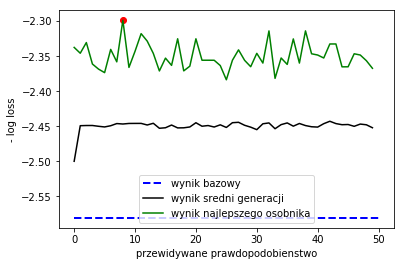

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.5828129780108062



gen: 100
avg time per gen: 21.4

Optymalizacja trwała 2141.81 sekund dla 200 osobników i 100 iteracji.
Best params:
C: 0.6947757990508276
Gamma: 0.5911548695407318
neg_log_loss: -2.300198118566451



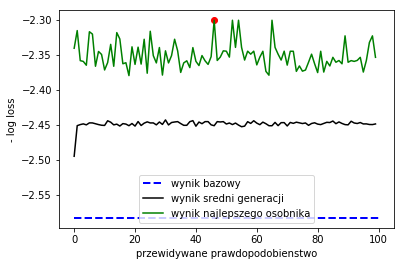

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

(102, 37)
[-60.0, -50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]
Base score: -2.4408006510917533



gen: 5
avg time per gen: 0.2

Optymalizacja trwała 1.17 sekund dla 10 osobników i 5 iteracji.
Best params:
C: 0.4989174816526971
Gamma: 0.2388946458412523
neg_log_loss: -2.3186135169406734



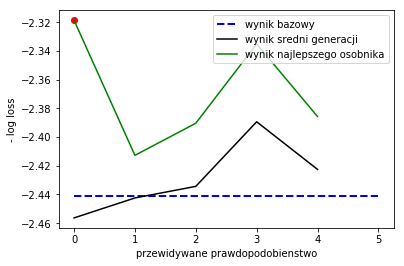

Generation:  10%|█         | 1/10 [00:00<00:01,  7.70it/s]

Base score: -2.3686582896402437



gen: 10
avg time per gen: 0.3

Optymalizacja trwała 3.39 sekund dla 10 osobników i 10 iteracji.
Best params:
C: 0.9519337149498026
Gamma: 0.7722837688541418
neg_log_loss: -2.248885412514342



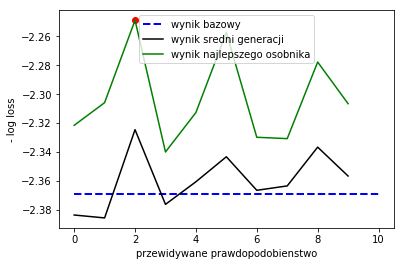

Generation:   5%|▌         | 1/20 [00:00<00:02,  9.14it/s]

Base score: -2.508868732906053



gen: 20
avg time per gen: 0.4

Optymalizacja trwała 8.47 sekund dla 10 osobników i 20 iteracji.
Best params:
C: 0.78968678925203
Gamma: 0.865127339638928
neg_log_loss: -2.2845838401467358



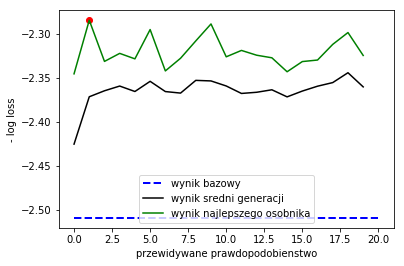

Generation:   2%|▏         | 1/50 [00:00<00:05,  9.13it/s]

Base score: -2.465770440012236



gen: 50
avg time per gen: 0.9

Optymalizacja trwała 45.36 sekund dla 10 osobników i 50 iteracji.
Best params:
C: 0.5221475930012635
Gamma: 0.8978028974844097
neg_log_loss: -2.258523656141409



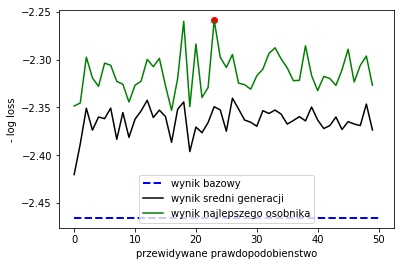

Generation:   1%|          | 1/100 [00:00<00:10,  9.33it/s]

Base score: -2.4373052588785376



gen: 100
avg time per gen: 2.2

Optymalizacja trwała 215.56 sekund dla 10 osobników i 100 iteracji.
Best params:
C: 0.7784533043925451
Gamma: 0.9036265533181674
neg_log_loss: -2.2491896116313064



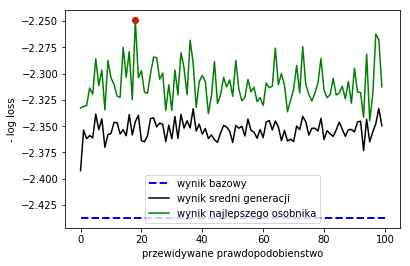

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4439613732210868



gen: 5
avg time per gen: 0.4

Optymalizacja trwała 1.80 sekund dla 20 osobników i 5 iteracji.
Best params:
C: 0.7348264295412619
Gamma: 0.7920281321026932
neg_log_loss: -2.2673157142136833



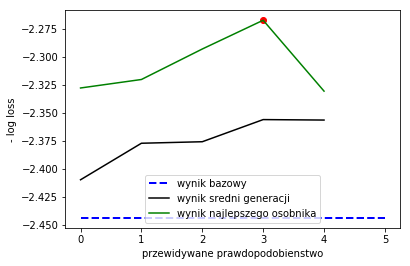

Generation:  10%|█         | 1/10 [00:00<00:01,  5.29it/s]

Base score: -2.488562346477071



gen: 10
avg time per gen: 0.4

Optymalizacja trwała 4.15 sekund dla 20 osobników i 10 iteracji.
Best params:
C: 0.773557379254715
Gamma: 0.9401556431009079
neg_log_loss: -2.2491658313157235



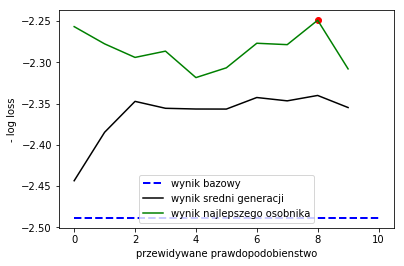

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4249501651330734



gen: 20
avg time per gen: 0.7

Optymalizacja trwała 13.49 sekund dla 20 osobników i 20 iteracji.
Best params:
C: 0.8095716943220607
Gamma: 0.9480050934875478
neg_log_loss: -2.266422081998461



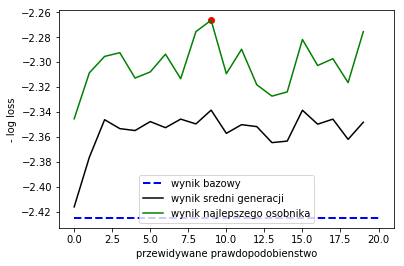

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.4260250336195295



gen: 50
avg time per gen: 1.4

Optymalizacja trwała 72.13 sekund dla 20 osobników i 50 iteracji.
Best params:
C: 0.7438877159800646
Gamma: 0.9296184494168541
neg_log_loss: -2.2542065594314433



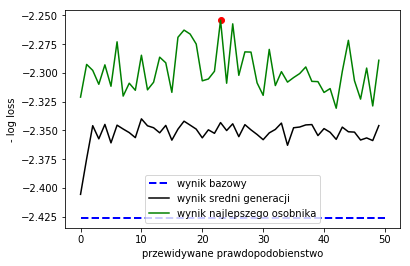

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.491383532366399



gen: 100
avg time per gen: 2.5

Optymalizacja trwała 254.93 sekund dla 20 osobników i 100 iteracji.
Best params:
C: 0.9125118334081413
Gamma: 0.8307337192848814
neg_log_loss: -2.2360995554890533



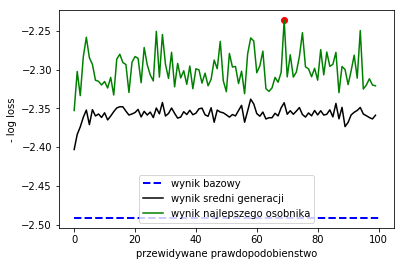

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.461850776697717



gen: 5
avg time per gen: 0.6

Optymalizacja trwała 3.06 sekund dla 50 osobników i 5 iteracji.
Best params:
C: 0.8354599782101102
Gamma: 0.7654079664559363
neg_log_loss: -2.272703324482449



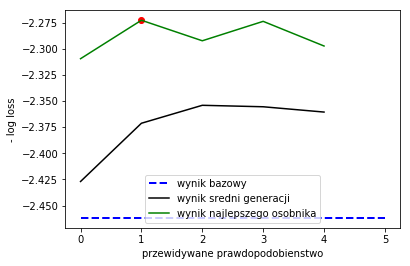

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.311233271092135



gen: 10
avg time per gen: 0.9

Optymalizacja trwała 8.80 sekund dla 50 osobników i 10 iteracji.
Best params:
C: 0.6615616411798638
Gamma: 0.801659118904964
neg_log_loss: -2.284497397598143



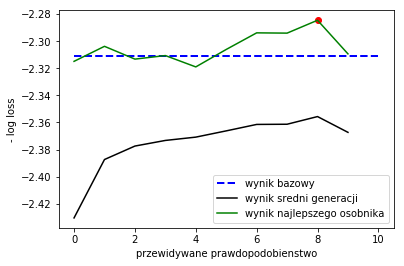

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4531001726499966



gen: 20
avg time per gen: 1.6

Optymalizacja trwała 32.01 sekund dla 50 osobników i 20 iteracji.
Best params:
C: 0.6785443386315824
Gamma: 0.8628623952836221
neg_log_loss: -2.2594674785766626



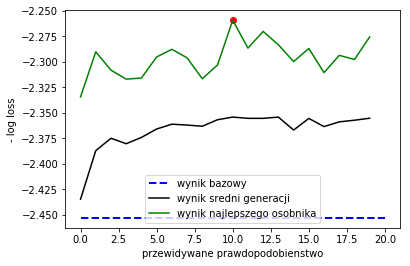

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.4781965997132938



gen: 50
avg time per gen: 3.4

Optymalizacja trwała 168.93 sekund dla 50 osobników i 50 iteracji.
Best params:
C: 0.773089930044491
Gamma: 0.897323529900992
neg_log_loss: -2.245520853254445



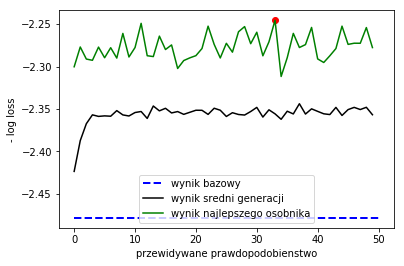

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.4285338166561883



gen: 100
avg time per gen: 6.5

Optymalizacja trwała 647.44 sekund dla 50 osobników i 100 iteracji.
Best params:
C: 0.7351454962640498
Gamma: 0.9501811957304616
neg_log_loss: -2.245205768915884



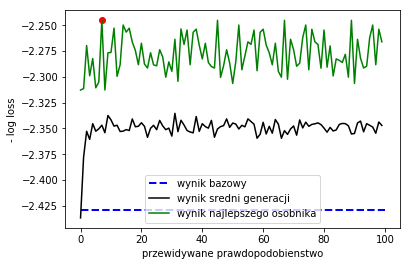

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.43407772123644



gen: 5
avg time per gen: 1.3

Optymalizacja trwała 6.58 sekund dla 100 osobników i 5 iteracji.
Best params:
C: 0.8743559761081052
Gamma: 0.6662446674285528
neg_log_loss: -2.2865993251015846



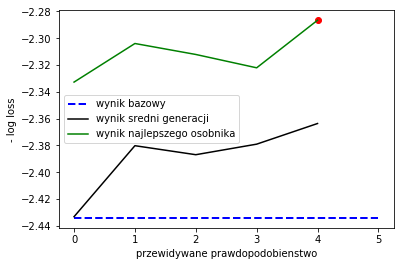

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.389183040011775



gen: 10
avg time per gen: 1.8

Optymalizacja trwała 17.77 sekund dla 100 osobników i 10 iteracji.
Best params:
C: 0.8650626348959151
Gamma: 0.8833552207153222
neg_log_loss: -2.228062538577465



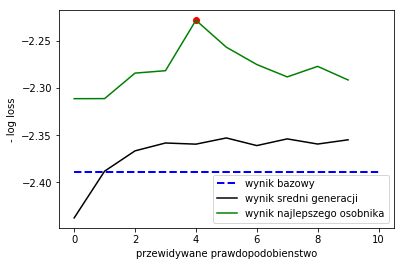

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.467652205342419



gen: 20
avg time per gen: 2.8

Optymalizacja trwała 55.48 sekund dla 100 osobników i 20 iteracji.
Best params:
C: 0.7586462399803051
Gamma: 0.753037518693385
neg_log_loss: -2.2359564673768024



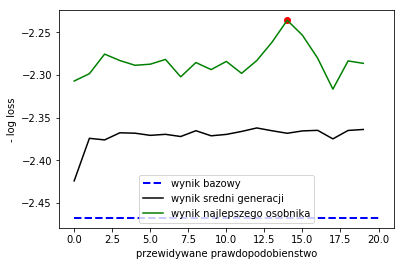

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.422172118955765



gen: 50
avg time per gen: 5.3

Optymalizacja trwała 267.03 sekund dla 100 osobników i 50 iteracji.
Best params:
C: 0.7209931175260965
Gamma: 0.8537193777427231
neg_log_loss: -2.2344659780572353



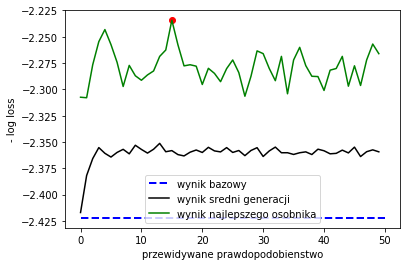

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.458514910110307



gen: 100
avg time per gen: 9.5

Optymalizacja trwała 953.56 sekund dla 100 osobników i 100 iteracji.
Best params:
C: 0.677531893755649
Gamma: 0.7360648629417814
neg_log_loss: -2.2345565154159517



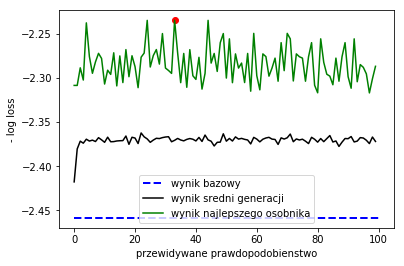

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.5305731988502562



gen: 5
avg time per gen: 2.3

Optymalizacja trwała 11.79 sekund dla 200 osobników i 5 iteracji.
Best params:
C: 0.8387280573789979
Gamma: 0.8443232795804135
neg_log_loss: -2.2574527108038107



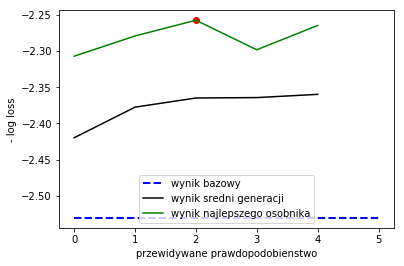

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.3759170024775544



gen: 10
avg time per gen: 3.6

Optymalizacja trwała 35.85 sekund dla 200 osobników i 10 iteracji.
Best params:
C: 0.7466720833351023
Gamma: 0.7949656752866692
neg_log_loss: -2.245368506606779



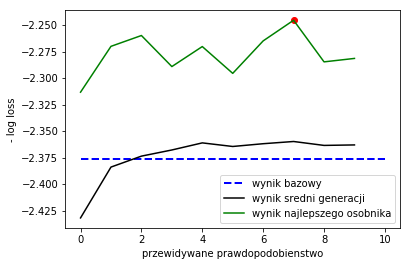

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4615222130206993



gen: 20
avg time per gen: 5.2

Optymalizacja trwała 104.80 sekund dla 200 osobników i 20 iteracji.
Best params:
C: 0.7829659869223037
Gamma: 0.8826534117080838
neg_log_loss: -2.244266824937834



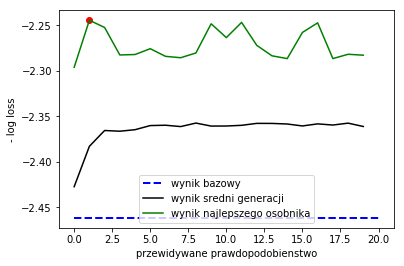

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.421134346315032



gen: 50
avg time per gen: 9.3

Optymalizacja trwała 463.23 sekund dla 200 osobników i 50 iteracji.
Best params:
C: 0.7248771511060617
Gamma: 0.8333128185994356
neg_log_loss: -2.2338410562312143



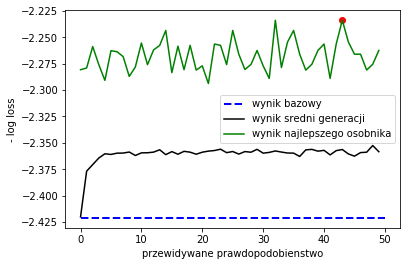

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.476071182622181



gen: 100
avg time per gen: 18.1

Optymalizacja trwała 1813.25 sekund dla 200 osobników i 100 iteracji.
Best params:
C: 0.7102536100895543
Gamma: 0.8144433184936387
neg_log_loss: -2.2342693402988516



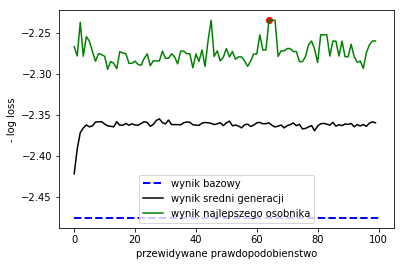

Done.


In [5]:
from itertools import product
from time import time

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

from ga.evoalgo_svm import EvoAlgo

def test_EA(train, test, pop_members, max_iter):
    
    combinations = list(product(pop_members, max_iter))
    
    clf_train = SVC(kernel='rbf', probability=True, C=1.0, gamma='auto')
    
    results = []
    
    for pop, it in combinations:
        ea = EvoAlgo(clf_train, pop_members=pop, max_iter=it)
        
        start = time()
        ea.fit(train.data, train.target)
        end = time()
        print(f'\nOptymalizacja trwała {end - start:.2f} sekund dla {pop} osobników i {it} iteracji.')
        
        ea.get_params()
        results.append({
                        'pop': pop,
                        'iter': it,
                        'gen_num': ea._best_score.gen_num,
                        'C': ea._best_score.params[0],
                        'Gamma': ea._best_score.params[1],
                        'cv_score': ea._best_score.score,
                        'time': end - start
                       })

        ea.plot()

        clf_test = SVC(kernel='rbf', probability=True, C=results[-1]['C'], gamma=results[-1]['Gamma'])
        clf_test.fit(train.data, train.target)
        y_pred = clf_test.predict(test.data)
        y_pred_proba = clf_test.predict_proba(test.data)

        results[-1]['log_loss'] = log_loss(test.target, y_pred_proba)
        results[-1]['accuracy'] = accuracy_score(test.target, y_pred)
    
    return results

datasets = ['tani', 'średni', 'drogi']
pop_members = [10, 20, 50, 100, 200]
max_iter = [5, 10, 20, 50, 100]

for dataset in datasets:
    train, test = load_data(dataset, True)
    results = test_EA(train, test, pop_members, max_iter)
    save_results(results, 'results_normal_pop_init.csv')
else:
    print('Done.')

## Test na rozkładzie jednostajnym (0, 10)

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

(102, 37)
[-60.0, -50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]
Base score: -2.3890617060970047



gen: 5
avg time per gen: 0.4

Optymalizacja trwała 1.83 sekund dla 10 osobników i 5 iteracji.
Best params:
C: 6.2000023864762195
Gamma: 1.1418291968190997
neg_log_loss: -2.2833969814214976



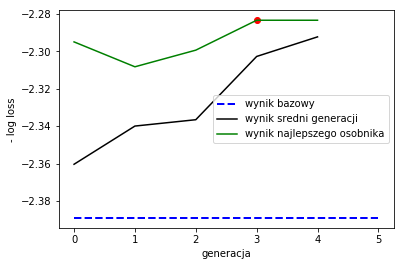

Generation:  10%|█         | 1/10 [00:00<00:01,  5.10it/s]

Base score: -2.464942383253413



gen: 10
avg time per gen: 0.4

Optymalizacja trwała 4.39 sekund dla 10 osobników i 10 iteracji.
Best params:
C: 8.131339298769108
Gamma: 2.485681733132692
neg_log_loss: -2.314620939585318



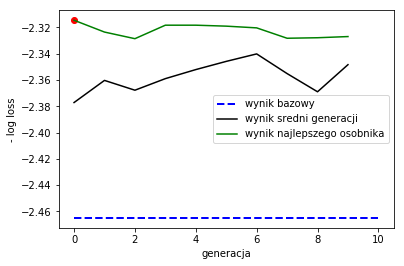

Generation:   5%|▌         | 1/20 [00:00<00:03,  5.32it/s]

Base score: -2.4275665239003703



gen: 20
avg time per gen: 0.7

Optymalizacja trwała 13.51 sekund dla 10 osobników i 20 iteracji.
Best params:
C: 4.257617485749416
Gamma: 1.852351003259743
neg_log_loss: -2.2956091143121746



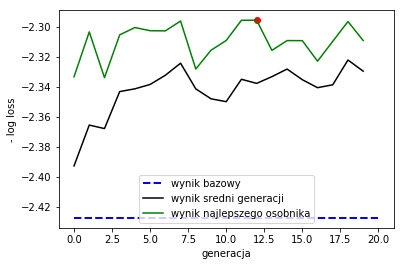

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.417855428631187



gen: 50
avg time per gen: 1.1

Optymalizacja trwała 56.23 sekund dla 10 osobników i 50 iteracji.
Best params:
C: 4.885378214158334
Gamma: 0.7113347610807956
neg_log_loss: -2.2600473389734903



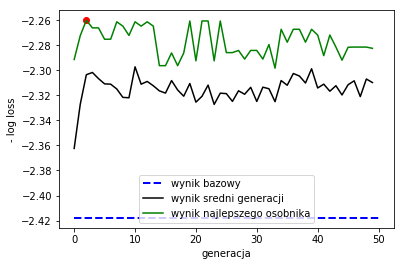

Generation:   1%|          | 1/100 [00:00<00:14,  6.67it/s]

Base score: -2.422877351842678



gen: 100
avg time per gen: 2.3

Optymalizacja trwała 231.34 sekund dla 10 osobników i 100 iteracji.
Best params:
C: 3.8713554667049674
Gamma: 1.0357501976805552
neg_log_loss: -2.2614258205532067



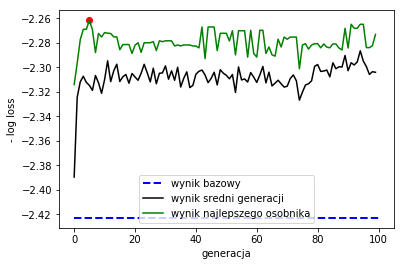

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.451482536092512



gen: 5
avg time per gen: 0.4

Optymalizacja trwała 1.82 sekund dla 20 osobników i 5 iteracji.
Best params:
C: 6.749783578085065
Gamma: 0.890762619614762
neg_log_loss: -2.264711869946682



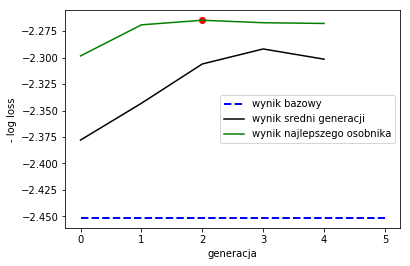

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.446034060694422



gen: 10
avg time per gen: 0.5

Optymalizacja trwała 4.91 sekund dla 20 osobników i 10 iteracji.
Best params:
C: 8.468546269350341
Gamma: 1.7548183021640387
neg_log_loss: -2.278581392674545



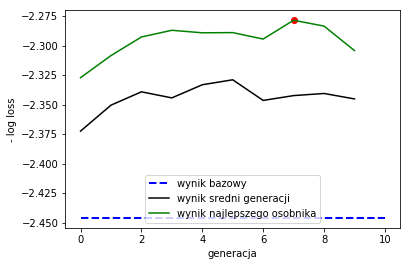

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4365824019049676



gen: 20
avg time per gen: 0.9

Optymalizacja trwała 17.36 sekund dla 20 osobników i 20 iteracji.
Best params:
C: 6.9259787291998824
Gamma: 1.0313261542893173
neg_log_loss: -2.266685845184439



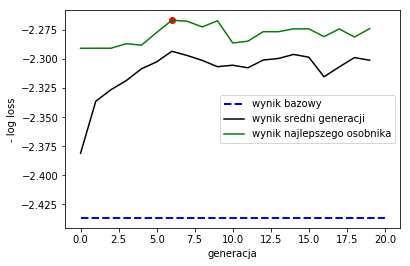

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.4579854875475498



gen: 50
avg time per gen: 1.7

Optymalizacja trwała 86.99 sekund dla 20 osobników i 50 iteracji.
Best params:
C: 6.012299266110672
Gamma: 0.7320161088248569
neg_log_loss: -2.241381005339549



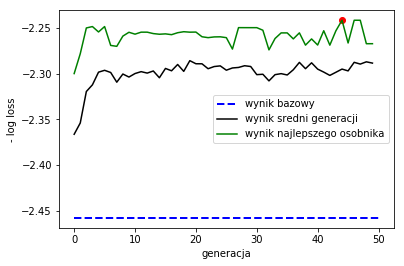

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.463632492897686



gen: 100
avg time per gen: 3.1

Optymalizacja trwała 306.00 sekund dla 20 osobników i 100 iteracji.
Best params:
C: 9.530449520066513
Gamma: 0.7347905856601755
neg_log_loss: -2.235877366031911



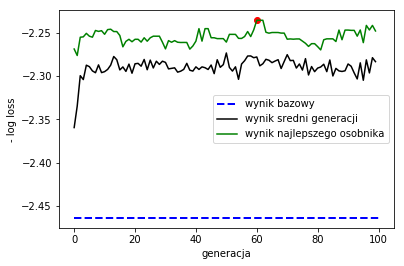

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.3969800693928054



gen: 5
avg time per gen: 0.9

Optymalizacja trwała 4.69 sekund dla 50 osobników i 5 iteracji.
Best params:
C: 3.545345542529493
Gamma: 1.2786750463108598
neg_log_loss: -2.2766109971243074



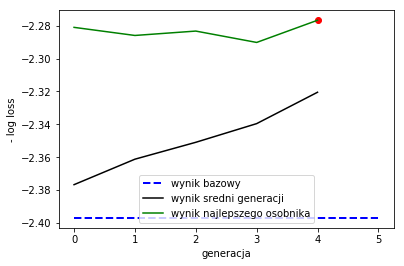

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.448950190668745



gen: 10
avg time per gen: 1.0

Optymalizacja trwała 10.08 sekund dla 50 osobników i 10 iteracji.
Best params:
C: 4.645771047792115
Gamma: 0.07152126374369572
neg_log_loss: -2.253623883919194



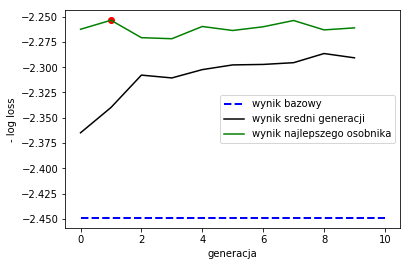

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4035964494314235



gen: 20
avg time per gen: 1.5

Optymalizacja trwała 30.34 sekund dla 50 osobników i 20 iteracji.
Best params:
C: 5.013222485485059
Gamma: 1.321122457683433
neg_log_loss: -2.267473609679747



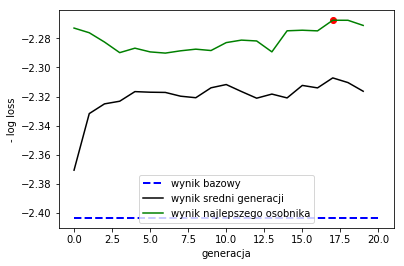

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.422700558211276



gen: 50
avg time per gen: 3.6

Optymalizacja trwała 182.27 sekund dla 50 osobników i 50 iteracji.
Best params:
C: 8.357896141135889
Gamma: 0.676450049932234
neg_log_loss: -2.2296721238040447



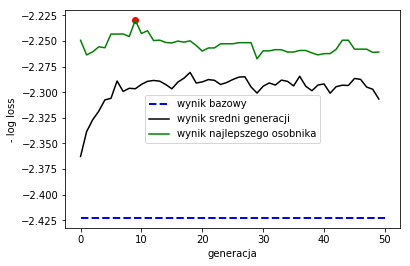

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.472420436677906



gen: 100
avg time per gen: 5.5

Optymalizacja trwała 554.27 sekund dla 50 osobników i 100 iteracji.
Best params:
C: 3.364822938905096
Gamma: 2.2194963031025545
neg_log_loss: -2.2806930721790235



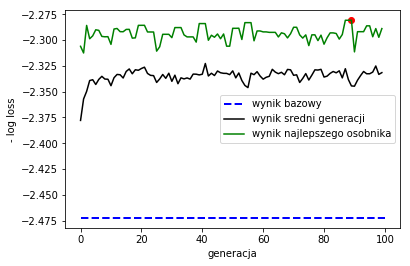

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4564927469719677



gen: 5
avg time per gen: 1.5

Optymalizacja trwała 7.61 sekund dla 100 osobników i 5 iteracji.
Best params:
C: 5.760027265122146
Gamma: 0.6495050316279765
neg_log_loss: -2.255572344636478



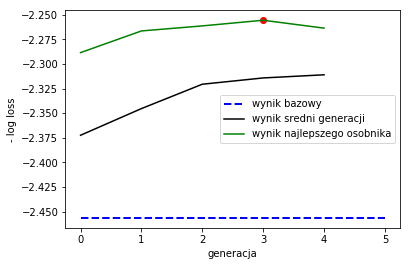

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.4333300698371634



gen: 10
avg time per gen: 1.9

Optymalizacja trwała 19.44 sekund dla 100 osobników i 10 iteracji.
Best params:
C: 7.371377117631353
Gamma: 0.8392931952824143
neg_log_loss: -2.2494879824859417



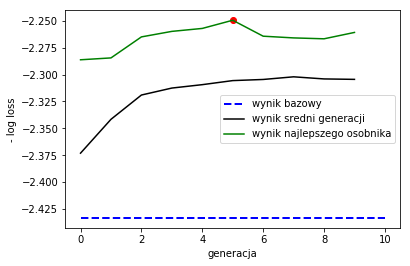

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4284718502104967



gen: 20
avg time per gen: 2.7

Optymalizacja trwała 53.77 sekund dla 100 osobników i 20 iteracji.
Best params:
C: 7.736571498159468
Gamma: 0.7121832101244732
neg_log_loss: -2.2480611798155756



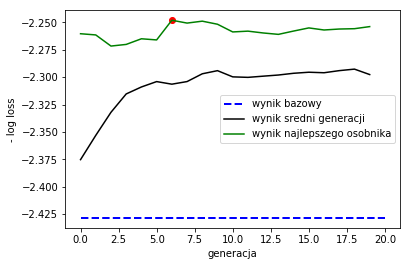

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.3610873621452004



gen: 50
avg time per gen: 5.6

Optymalizacja trwała 278.65 sekund dla 100 osobników i 50 iteracji.
Best params:
C: 8.312286459968165
Gamma: 0.040927638292939106
neg_log_loss: -2.182017385008986



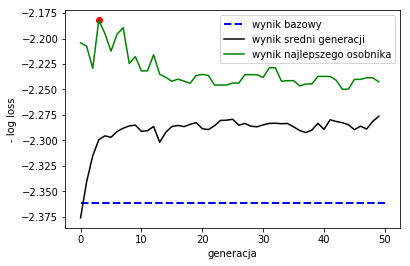

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.4152269522696406



gen: 100
avg time per gen: 10.0

Optymalizacja trwała 996.02 sekund dla 100 osobników i 100 iteracji.
Best params:
C: 6.138155478745185
Gamma: 0.9227947917746087
neg_log_loss: -2.25020231167255



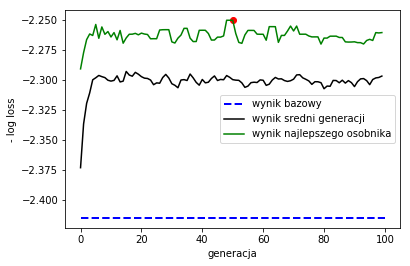

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4696794487952882



gen: 5
avg time per gen: 2.6

Optymalizacja trwała 13.15 sekund dla 200 osobników i 5 iteracji.
Best params:
C: 8.526677762621967
Gamma: 0.6451250626388156
neg_log_loss: -2.2393984439117074



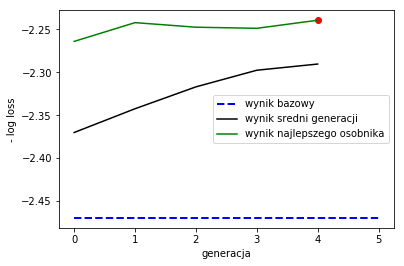

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.4366214924870633



gen: 10
avg time per gen: 3.3

Optymalizacja trwała 33.56 sekund dla 200 osobników i 10 iteracji.
Best params:
C: 6.626875954481736
Gamma: 0.7698864170906031
neg_log_loss: -2.2504347312000226



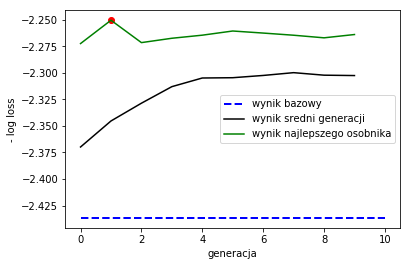

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4623772779152784



gen: 20
avg time per gen: 4.6

Optymalizacja trwała 92.78 sekund dla 200 osobników i 20 iteracji.
Best params:
C: 6.149830800482674
Gamma: 1.067780035696676
neg_log_loss: -2.2600399771314708



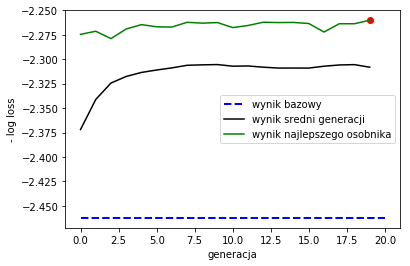

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.358710457912542



gen: 50
avg time per gen: 9.3

Optymalizacja trwała 466.95 sekund dla 200 osobników i 50 iteracji.
Best params:
C: 8.685976974510078
Gamma: 0.5563094196341608
neg_log_loss: -2.2237388096810156



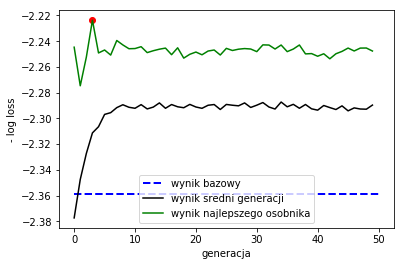

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.3921912009200956



gen: 100
avg time per gen: 22.6

Optymalizacja trwała 2257.44 sekund dla 200 osobników i 100 iteracji.
Best params:
C: 6.180296560872896
Gamma: 1.005777276171215
neg_log_loss: -2.2552504965876654



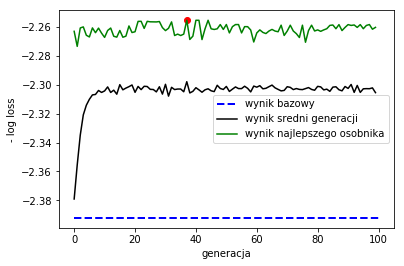

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

(102, 37)
[-60.0, -50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]
Base score: -2.511588899156431



gen: 5
avg time per gen: 0.3

Optymalizacja trwała 1.56 sekund dla 10 osobników i 5 iteracji.
Best params:
C: 4.210968930672973
Gamma: 2.346231892247234
neg_log_loss: -2.2952428664316207



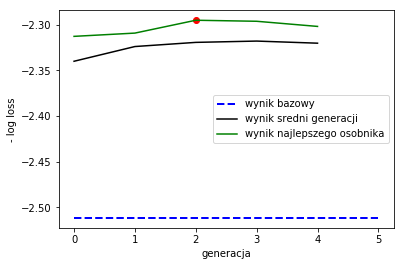

Generation:  10%|█         | 1/10 [00:00<00:01,  6.42it/s]

Base score: -2.4819712588578895



gen: 10
avg time per gen: 0.4

Optymalizacja trwała 4.01 sekund dla 10 osobników i 10 iteracji.
Best params:
C: 1.9842422738626202
Gamma: 2.917489734250133
neg_log_loss: -2.2839365967166687



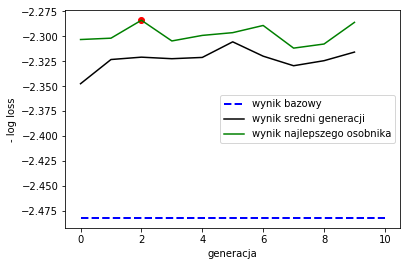

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.6686208521606196



gen: 20
avg time per gen: 0.6

Optymalizacja trwała 12.57 sekund dla 10 osobników i 20 iteracji.
Best params:
C: 4.20801533919754
Gamma: 4.065623012062335
neg_log_loss: -2.2931459649037285



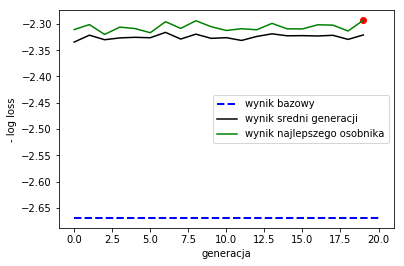

Generation:   2%|▏         | 1/50 [00:00<00:07,  6.83it/s]

Base score: -2.6475330866827793



gen: 50
avg time per gen: 1.3

Optymalizacja trwała 65.61 sekund dla 10 osobników i 50 iteracji.
Best params:
C: 7.866150258312938
Gamma: 1.737910678866137
neg_log_loss: -2.282742271495355



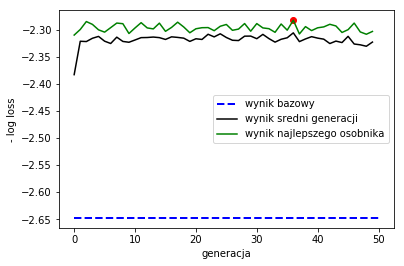

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.56451402650684



gen: 100
avg time per gen: 2.5

Optymalizacja trwała 247.65 sekund dla 10 osobników i 100 iteracji.
Best params:
C: 5.304856907748254
Gamma: 2.0901313011467737
neg_log_loss: -2.2801831737143288



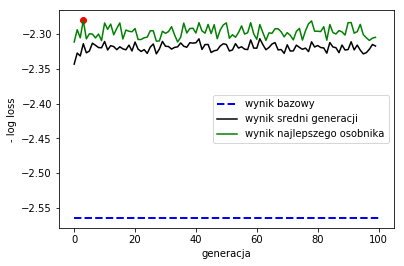

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4885867408572393



gen: 5
avg time per gen: 0.4

Optymalizacja trwała 2.02 sekund dla 20 osobników i 5 iteracji.
Best params:
C: 4.429248976169859
Gamma: 3.738299282418404
neg_log_loss: -2.2957986642502504



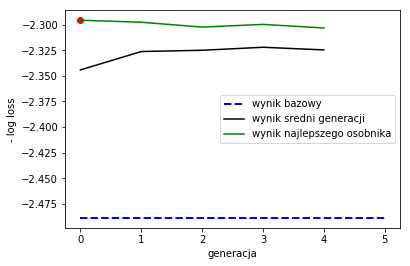

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.5564404179414097



gen: 10
avg time per gen: 0.6

Optymalizacja trwała 6.55 sekund dla 20 osobników i 10 iteracji.
Best params:
C: 7.804581775760258
Gamma: 0.9972297562996957
neg_log_loss: -2.271878948067415



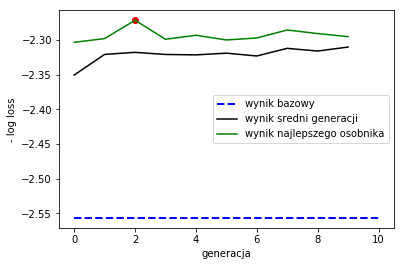

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4485366821982164



gen: 20
avg time per gen: 1.3

Optymalizacja trwała 25.52 sekund dla 20 osobników i 20 iteracji.
Best params:
C: 5.368215539802271
Gamma: 2.191708700680013
neg_log_loss: -2.2815658876483194



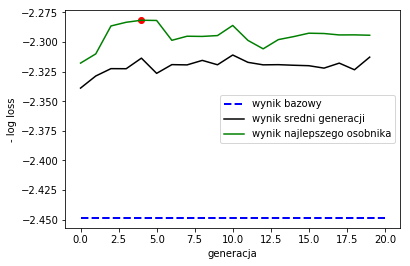

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.603279838474088



gen: 50
avg time per gen: 2.6

Optymalizacja trwała 129.87 sekund dla 20 osobników i 50 iteracji.
Best params:
C: 2.821509816491111
Gamma: 4.008089964918577
neg_log_loss: -2.2821586507154255



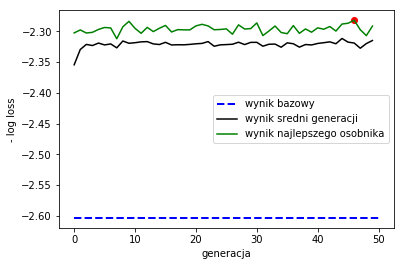

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.5771038074886734



gen: 100
avg time per gen: 4.0

Optymalizacja trwała 398.37 sekund dla 20 osobników i 100 iteracji.
Best params:
C: 4.503270261361268
Gamma: 2.230915890086032
neg_log_loss: -2.2731447992891356



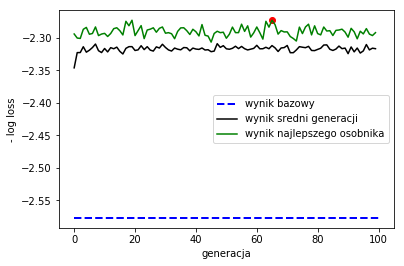

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.549729624377984



gen: 5
avg time per gen: 1.4

Optymalizacja trwała 7.02 sekund dla 50 osobników i 5 iteracji.
Best params:
C: 3.876885610520353
Gamma: 1.944297186694993
neg_log_loss: -2.2873472171327878



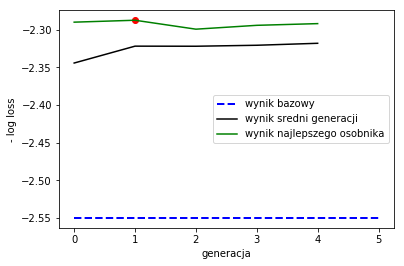

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.514616868027672



gen: 10
avg time per gen: 1.8

Optymalizacja trwała 17.71 sekund dla 50 osobników i 10 iteracji.
Best params:
C: 5.421474705006075
Gamma: 2.1913772940178977
neg_log_loss: -2.2748303103178693



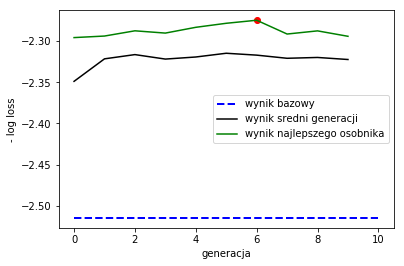

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4304985990048698



gen: 20
avg time per gen: 2.3

Optymalizacja trwała 45.62 sekund dla 50 osobników i 20 iteracji.
Best params:
C: 3.8775651268064437
Gamma: 2.1867767816956367
neg_log_loss: -2.2784812643998267



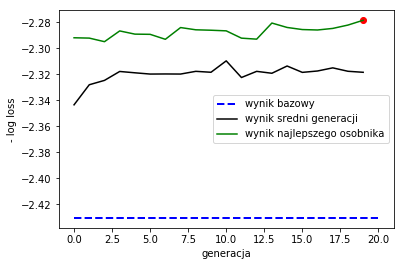

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.503365375507256



gen: 50
avg time per gen: 3.9

Optymalizacja trwała 194.49 sekund dla 50 osobników i 50 iteracji.
Best params:
C: 4.430781831512689
Gamma: 1.905585873707971
neg_log_loss: -2.2768107300585303



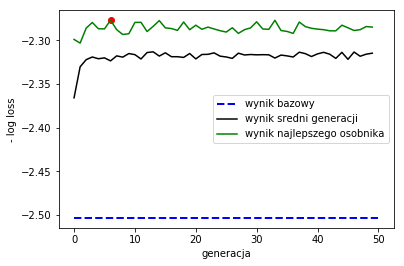

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.4761646058866607



gen: 100
avg time per gen: 6.1

Optymalizacja trwała 614.58 sekund dla 50 osobników i 100 iteracji.
Best params:
C: 7.080305579795845
Gamma: 2.3163952924865225
neg_log_loss: -2.2747221079257303



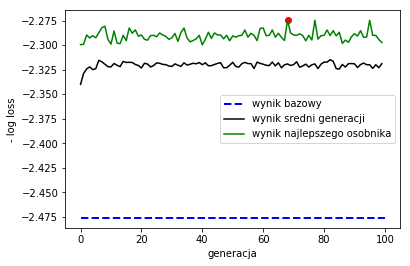

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4773770278617366



gen: 5
avg time per gen: 1.5

Optymalizacja trwała 7.44 sekund dla 100 osobników i 5 iteracji.
Best params:
C: 4.799428907335585
Gamma: 1.7119776539029425
neg_log_loss: -2.2794872360548966



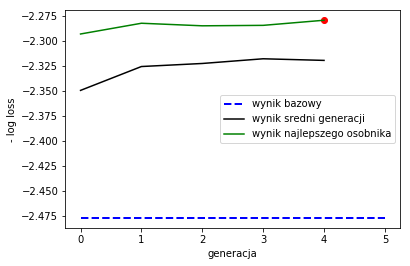

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.604521685648285



gen: 10
avg time per gen: 2.0

Optymalizacja trwała 19.63 sekund dla 100 osobników i 10 iteracji.
Best params:
C: 3.8628679364108702
Gamma: 3.3517596948079205
neg_log_loss: -2.2799293701588734



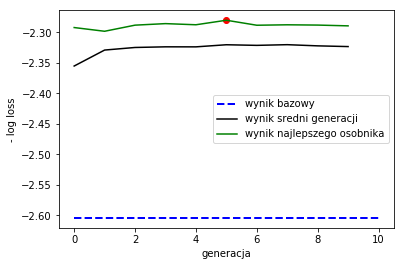

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4940547973138143



gen: 20
avg time per gen: 2.9

Optymalizacja trwała 57.95 sekund dla 100 osobników i 20 iteracji.
Best params:
C: 6.053327400268086
Gamma: 2.1189687256582594
neg_log_loss: -2.273387974064745



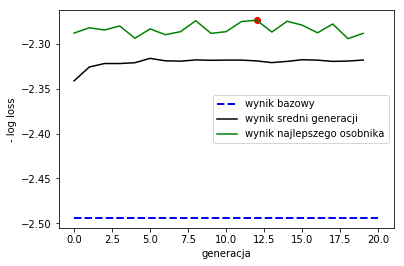

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.522486952298296



gen: 50
avg time per gen: 6.3

Optymalizacja trwała 313.40 sekund dla 100 osobników i 50 iteracji.
Best params:
C: 5.850821604313791
Gamma: 2.3295815306584737
neg_log_loss: -2.2719171282942794



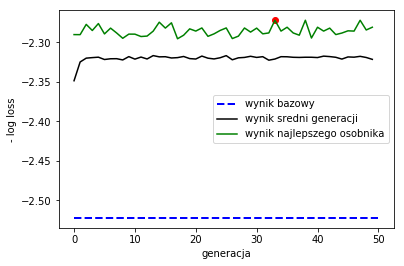

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.4412212708431804



gen: 100
avg time per gen: 13.7

Optymalizacja trwała 1368.35 sekund dla 100 osobników i 100 iteracji.
Best params:
C: 3.829680404589884
Gamma: 2.877184632452605
neg_log_loss: -2.270970502638991



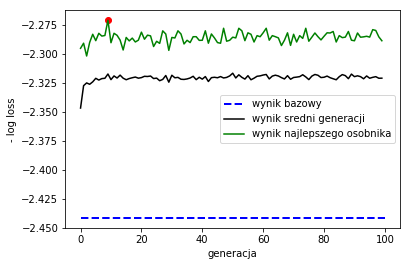

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.492577705169653



gen: 5
avg time per gen: 3.9

Optymalizacja trwała 19.52 sekund dla 200 osobników i 5 iteracji.
Best params:
C: 5.2012487929901505
Gamma: 1.9228102140092056
neg_log_loss: -2.266818920330321



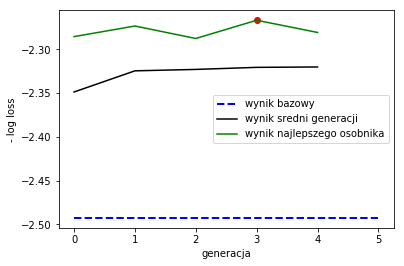

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.473059832843407



gen: 10
avg time per gen: 4.0

Optymalizacja trwała 39.96 sekund dla 200 osobników i 10 iteracji.
Best params:
C: 4.909841885094136
Gamma: 1.294051607203025
neg_log_loss: -2.265926031529216



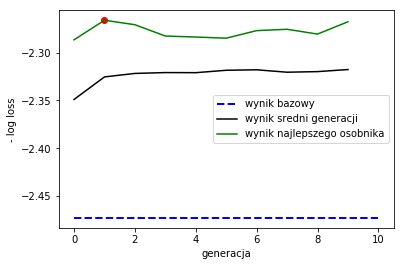

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.516063339855727



gen: 20
avg time per gen: 7.4

Optymalizacja trwała 149.04 sekund dla 200 osobników i 20 iteracji.
Best params:
C: 5.434341420039147
Gamma: 1.9740801799863583
neg_log_loss: -2.269737995958204



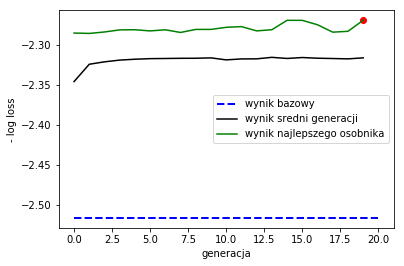

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.5357135941570963



gen: 50
avg time per gen: 14.4

Optymalizacja trwała 718.88 sekund dla 200 osobników i 50 iteracji.
Best params:
C: 4.362900033688563
Gamma: 2.371978401773179
neg_log_loss: -2.269267386867554



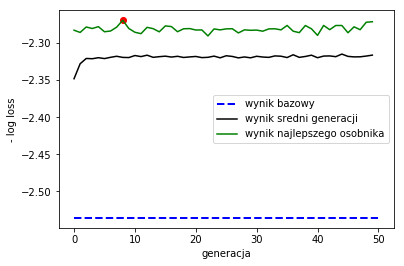

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.5019223452050454



gen: 100
avg time per gen: 21.4

Optymalizacja trwała 2143.99 sekund dla 200 osobników i 100 iteracji.
Best params:
C: 4.180534203093984
Gamma: 2.6628445920131534
neg_log_loss: -2.271437239595798



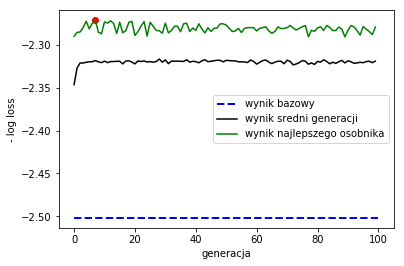

Generation:  20%|██        | 1/5 [00:00<00:00,  7.38it/s]

(102, 37)
[-60.0, -50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]
Base score: -2.3888900838213685



gen: 5
avg time per gen: 0.2

Optymalizacja trwała 0.96 sekund dla 10 osobników i 5 iteracji.
Best params:
C: 5.342617271144612
Gamma: 4.435369407935853
neg_log_loss: -2.2318626295907404



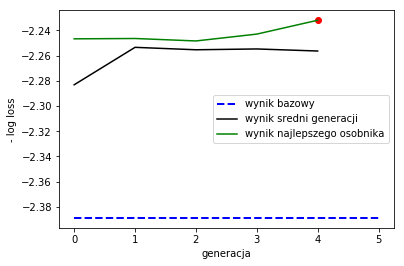

Generation:  10%|█         | 1/10 [00:00<00:01,  8.39it/s]

Base score: -2.3563597688990776



gen: 10
avg time per gen: 0.3

Optymalizacja trwała 2.63 sekund dla 10 osobników i 10 iteracji.
Best params:
C: 1.8312915319309364
Gamma: 3.637094422804763
neg_log_loss: -2.234246425636388



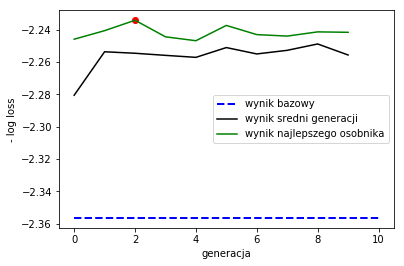

Generation:   5%|▌         | 1/20 [00:00<00:02,  8.22it/s]

Base score: -2.3933432524746845



gen: 20
avg time per gen: 0.4

Optymalizacja trwała 8.72 sekund dla 10 osobników i 20 iteracji.
Best params:
C: 3.1809079704309964
Gamma: 4.327072526485035
neg_log_loss: -2.2330345086265604



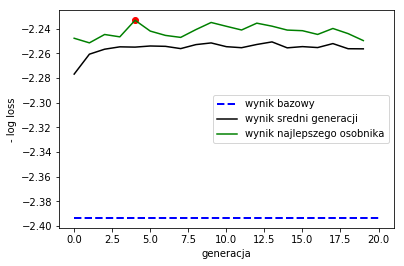

Generation:   2%|▏         | 1/50 [00:00<00:05,  8.88it/s]

Base score: -2.5838810918030313



gen: 50
avg time per gen: 0.9

Optymalizacja trwała 46.60 sekund dla 10 osobników i 50 iteracji.
Best params:
C: 4.504742608898155
Gamma: 5.391719779413259
neg_log_loss: -2.2305536819995875



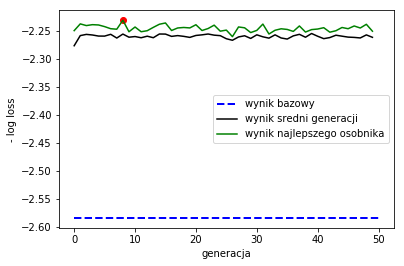

Generation:   1%|          | 1/100 [00:00<00:11,  8.86it/s]

Base score: -2.4112008968691745



gen: 100
avg time per gen: 2.0

Optymalizacja trwała 195.35 sekund dla 10 osobników i 100 iteracji.
Best params:
C: 4.2301990500171645
Gamma: 4.4569920564716865
neg_log_loss: -2.223204414312878



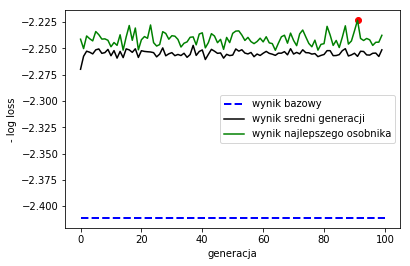

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4273514690185944



gen: 5
avg time per gen: 0.4

Optymalizacja trwała 2.24 sekund dla 20 osobników i 5 iteracji.
Best params:
C: 3.5540421804856717
Gamma: 3.4918019202416772
neg_log_loss: -2.2344705805693135



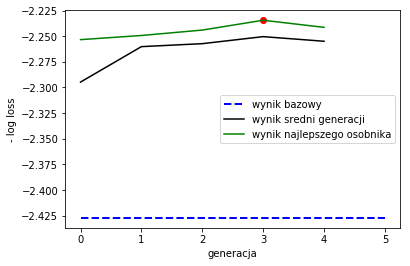

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.407369527761781



gen: 10
avg time per gen: 0.6

Optymalizacja trwała 5.77 sekund dla 20 osobników i 10 iteracji.
Best params:
C: 3.6426075820813195
Gamma: 3.5286197326656303
neg_log_loss: -2.2346011899826896



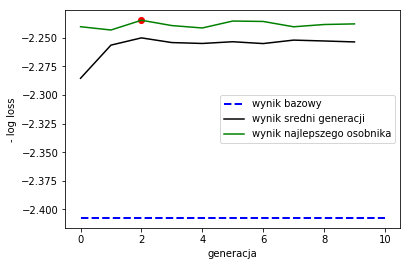

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4343622442643458



gen: 20
avg time per gen: 0.8

Optymalizacja trwała 16.68 sekund dla 20 osobników i 20 iteracji.
Best params:
C: 3.3286052355529776
Gamma: 4.754344025315206
neg_log_loss: -2.225926318586226



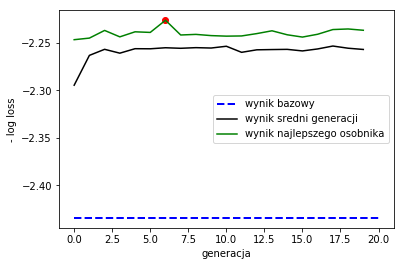

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.447308185163717



gen: 50
avg time per gen: 1.4

Optymalizacja trwała 69.54 sekund dla 20 osobników i 50 iteracji.
Best params:
C: 2.5949650793453176
Gamma: 3.599978580555536
neg_log_loss: -2.219404098860693



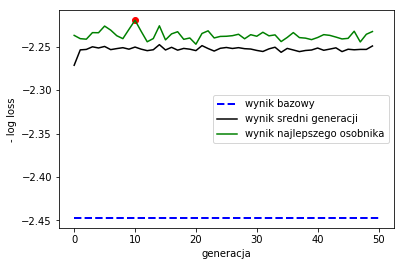

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.4714876352034763



gen: 100
avg time per gen: 2.5

Optymalizacja trwała 248.45 sekund dla 20 osobników i 100 iteracji.
Best params:
C: 3.7769867337852987
Gamma: 3.5758367615196165
neg_log_loss: -2.2210203521797753



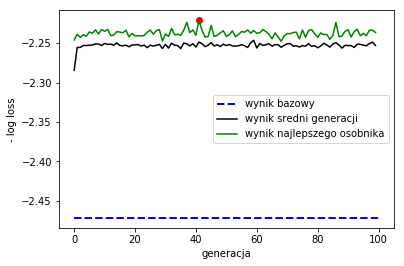

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4491544706293684



gen: 5
avg time per gen: 1.1

Optymalizacja trwała 5.45 sekund dla 50 osobników i 5 iteracji.
Best params:
C: 1.2773787154590903
Gamma: 4.072829826403177
neg_log_loss: -2.2343662266529143



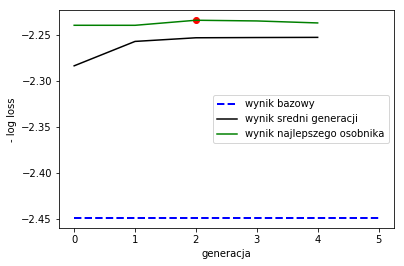

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.419443267859306



gen: 10
avg time per gen: 1.6

Optymalizacja trwała 16.35 sekund dla 50 osobników i 10 iteracji.
Best params:
C: 4.315766680033683
Gamma: 3.5949540059515224
neg_log_loss: -2.221960920939041



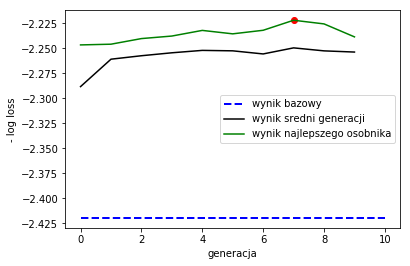

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4530346380619963



gen: 20
avg time per gen: 2.2

Optymalizacja trwała 43.90 sekund dla 50 osobników i 20 iteracji.
Best params:
C: 4.073570809063635
Gamma: 3.9722752058493582
neg_log_loss: -2.2200883159826077



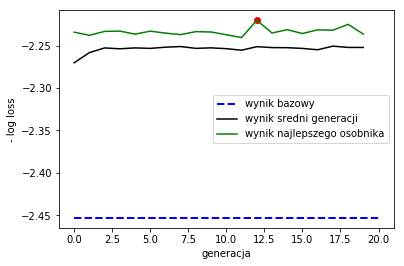

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.351135072607115



gen: 50
avg time per gen: 3.3

Optymalizacja trwała 167.21 sekund dla 50 osobników i 50 iteracji.
Best params:
C: 3.411611333281861
Gamma: 3.2610049079875707
neg_log_loss: -2.224180425553158



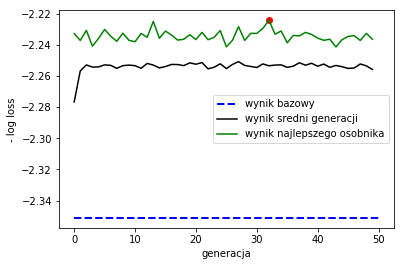

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.430900418886258



gen: 100
avg time per gen: 6.4

Optymalizacja trwała 640.09 sekund dla 50 osobników i 100 iteracji.
Best params:
C: 5.3507510120436015
Gamma: 4.360709068505318
neg_log_loss: -2.224560484333962



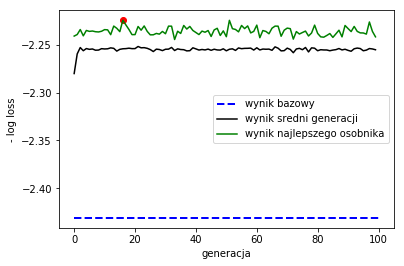

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4987841654631024



gen: 5
avg time per gen: 1.4

Optymalizacja trwała 6.99 sekund dla 100 osobników i 5 iteracji.
Best params:
C: 9.494215580709813
Gamma: 0.05940644753925861
neg_log_loss: -2.206844969289763



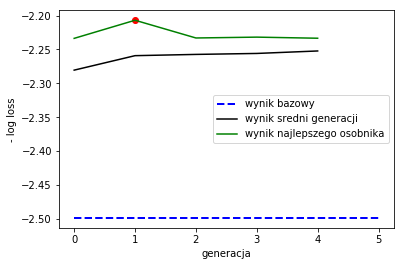

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.4918115485267336



gen: 10
avg time per gen: 1.9

Optymalizacja trwała 18.66 sekund dla 100 osobników i 10 iteracji.
Best params:
C: 3.478494719878972
Gamma: 3.956318053170092
neg_log_loss: -2.2229026564763226



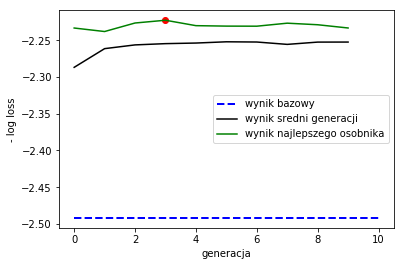

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.42055065230842



gen: 20
avg time per gen: 2.7

Optymalizacja trwała 55.02 sekund dla 100 osobników i 20 iteracji.
Best params:
C: 3.2786242923981077
Gamma: 3.7941415053388923
neg_log_loss: -2.2228402566940333



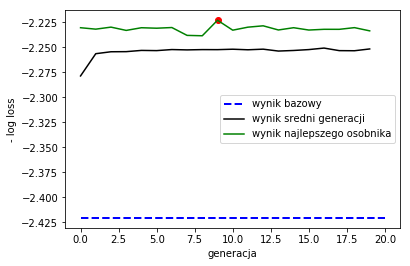

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.429094959872878



gen: 50
avg time per gen: 6.2

Optymalizacja trwała 310.55 sekund dla 100 osobników i 50 iteracji.
Best params:
C: 8.997209273569823
Gamma: 0.059623256217749
neg_log_loss: -2.2102955900592978



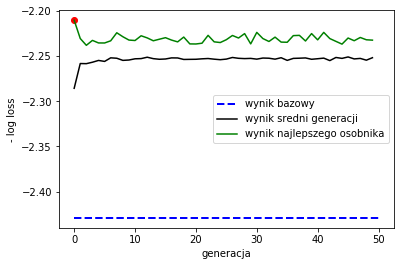

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.5080312967700764



gen: 100
avg time per gen: 12.1

Optymalizacja trwała 1211.22 sekund dla 100 osobników i 100 iteracji.
Best params:
C: 3.980217561885443
Gamma: 4.076469259589814
neg_log_loss: -2.2218626412541598



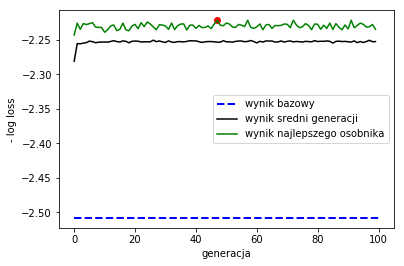

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4272743029713446



gen: 5
avg time per gen: 3.0

Optymalizacja trwała 15.01 sekund dla 200 osobników i 5 iteracji.
Best params:
C: 4.108456408499222
Gamma: 4.18285903328095
neg_log_loss: -2.2294171766800064



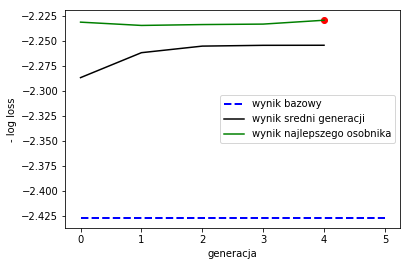

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.5016339875379323



gen: 10
avg time per gen: 3.5

Optymalizacja trwała 35.52 sekund dla 200 osobników i 10 iteracji.
Best params:
C: 4.10450504569474
Gamma: 3.7290214240390145
neg_log_loss: -2.2261909076356883



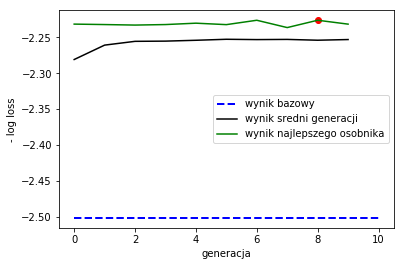

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.4910986081880324



gen: 20
avg time per gen: 5.2

Optymalizacja trwała 104.63 sekund dla 200 osobników i 20 iteracji.
Best params:
C: 3.507913932751889
Gamma: 3.7324629399921676
neg_log_loss: -2.220194838069838



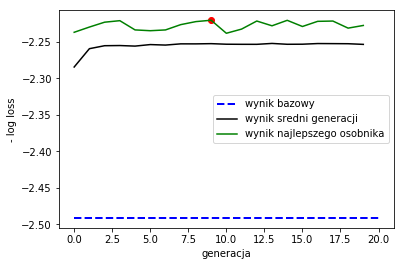

Generation:   0%|          | 0/50 [00:00<?, ?it/s]

Base score: -2.4051898082326892



gen: 50
avg time per gen: 11.4

Optymalizacja trwała 571.33 sekund dla 200 osobników i 50 iteracji.
Best params:
C: 3.4669522174163228
Gamma: 3.9107590031427186
neg_log_loss: -2.219035282919605



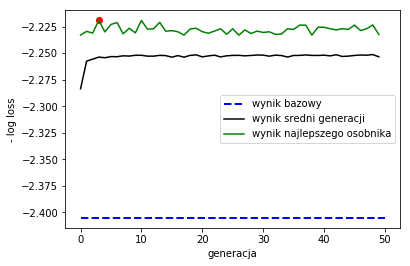

Generation:   0%|          | 0/100 [00:00<?, ?it/s]

Base score: -2.4655329435151785



gen: 100
avg time per gen: 20.5

Optymalizacja trwała 2048.93 sekund dla 200 osobników i 100 iteracji.
Best params:
C: 3.7485049339869803
Gamma: 3.889420709721513
neg_log_loss: -2.214077198443521



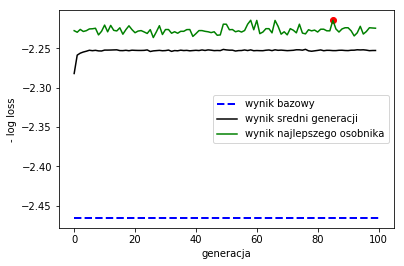

Done.


In [5]:
for dataset in datasets:
    train, test = load_data(dataset, True)
    results2 = test_EA(train, test, pop_members, max_iter)
    save_results(results2, 'results_mult_pop_init.csv')
else:
    print('Done.')